In [10]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns

base_dir = './Audiodata'

data = []

def process_audio(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        pitch, mag = librosa.piptrack(y=audio, sr=sr)
        pitch = np.max(pitch[pitch != 0])
        energy = np.sum(librosa.feature.rms(y=audio))
        duration = librosa.get_duration(y=audio, sr=sr)
        return mfccs, pitch, energy, duration, sr
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None, None, None, None


audio_files = glob(os.path.join(base_dir, '**', '*.wav'), recursive=True)

for file_path in audio_files:
    mfccs, pitch, energy, duration, sr = process_audio(file_path)
    if mfccs is not None:
        filename = os.path.basename(file_path)
        actor_folder = os.path.basename(os.path.dirname(file_path))
        emotion_code = filename.split("-")[2]
        data.append({'Filename': filename, 'Emotion': emotion_code, 'Pitch': pitch, 'Energy': energy, 'Duration': duration, 'MFCCs': mfccs.mean(axis=1), 'Actor': actor_folder})

df = pd.DataFrame(data)


HEATMAP

The heatmap reveals distinct patterns associated with various emotions, which can be harnessed for classification purposes. From this visualization, it is evident that Emotion 05 and Emotion 06 exhibit relatively high values for coefficients 0-2, while Emotion 03 and Emotion 08 exhibit negative values. This differentiation presents a potential avenue for training machine learning models to classify emotions based on audio features.

The graph provides a unique signature for each emotion. Notably, Emotion 05 exhibits a pronounced presence in lower coefficients, suggesting a higher level of energy or expressiveness. Conversely, emotions such as 03 and 07 exhibit more negative values across the spectrum, indicating calmer or more neutral emotional states.

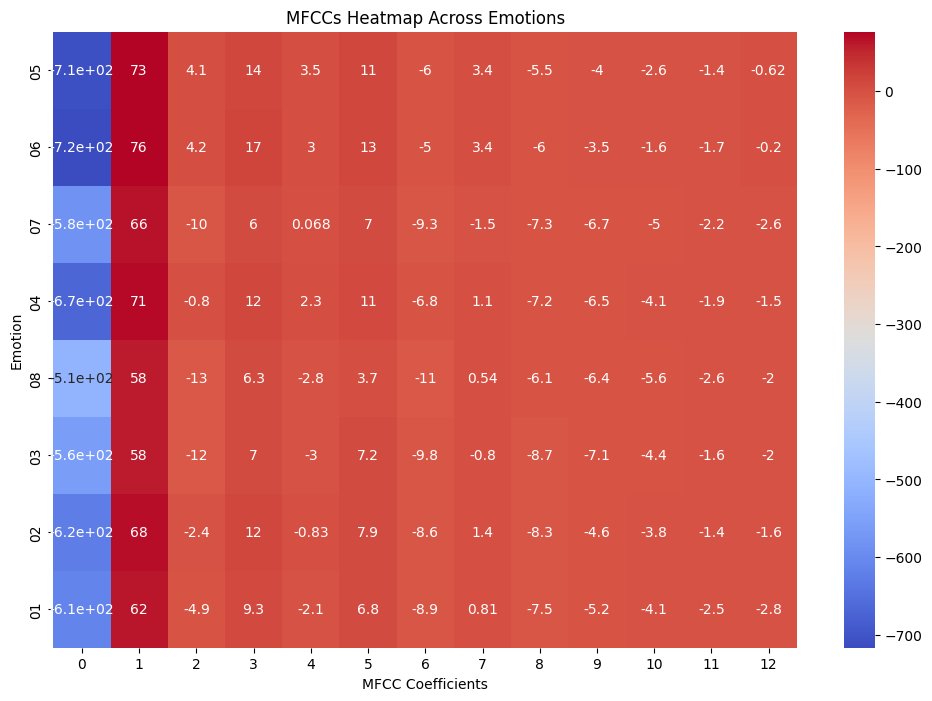

In [11]:
mfccs_by_emotion = pd.DataFrame(df.groupby('Emotion')['MFCCs'].apply(np.mean).to_list(), index=df['Emotion'].unique())

plt.figure(figsize=(12, 8))
sns.heatmap(mfccs_by_emotion, cmap='coolwarm', annot=True)
plt.title('MFCCs Heatmap Across Emotions')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Emotion')
plt.show()

PAIRPLOT

This pairplot illustrates the distribution of distinct emotions across key audio features, including Pitch, Energy, and Duration. Emotion 05 exhibits a tight clustering around higher pitch and energy values, suggesting that this emotion possesses more pronounced vocal characteristics. Conversely, Emotions 01 and 02 exhibit greater variability across these features, indicating a broader range of emotional expressions.

This analysis serves as a valuable tool for selecting features in emotion classification models. Features such as Pitch and Energy demonstrate strong clustering for specific emotions, rendering them reliable indicators for distinguishing between emotional states.

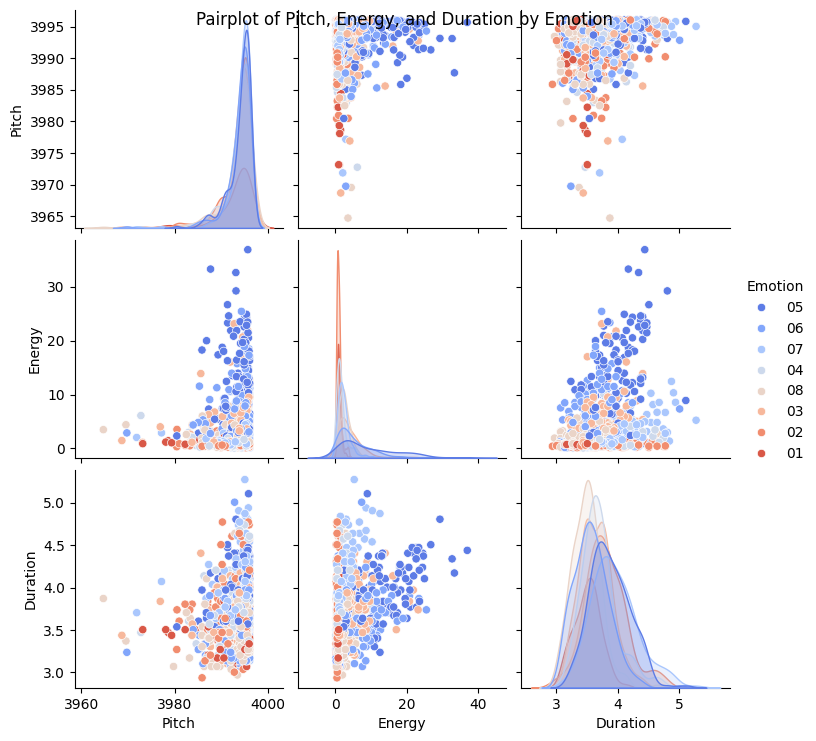

In [12]:
sns.pairplot(df[['Pitch', 'Energy', 'Duration', 'Emotion']], hue='Emotion', palette='coolwarm')
plt.suptitle('Pairplot of Pitch, Energy, and Duration by Emotion')
plt.show()

SCATTER PLOT

The provided 3D scatter plot elucidates the correlation between Pitch, Energy, and Duration for various emotional states. Each data point corresponds to an audio sample, and its position is determined by these three attributes.

The majority of points exhibit a concentration in higher Pitch values and lower Energy values, with a limited dispersion towards higher Energy levels. Furthermore, longer durations are generally associated with elevated Energy levels.

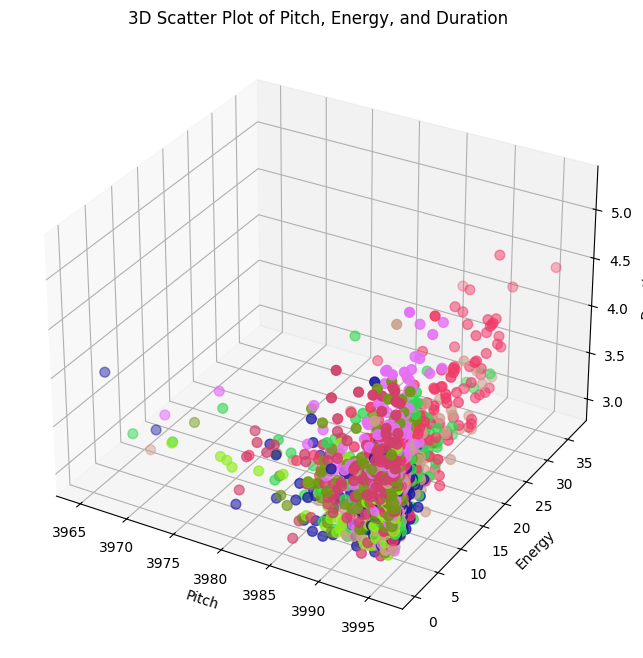

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

emotion_colors = {emotion: np.random.rand(3,) for emotion in df['Emotion'].unique()}
colors = [emotion_colors[emotion] for emotion in df['Emotion']]

ax.scatter(df['Pitch'], df['Energy'], df['Duration'], c=colors, s=50)
ax.set_xlabel('Pitch')
ax.set_ylabel('Energy')
ax.set_zlabel('Duration')
plt.title('3D Scatter Plot of Pitch, Energy, and Duration')
plt.show()

/var/folders/9s/_bdkpcn97vl4s3fspt3wmnfh0000gn/T/ipykernel_55357/3863640169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Emotion', y='Pitch', data=df, jitter=True, palette='Set1')


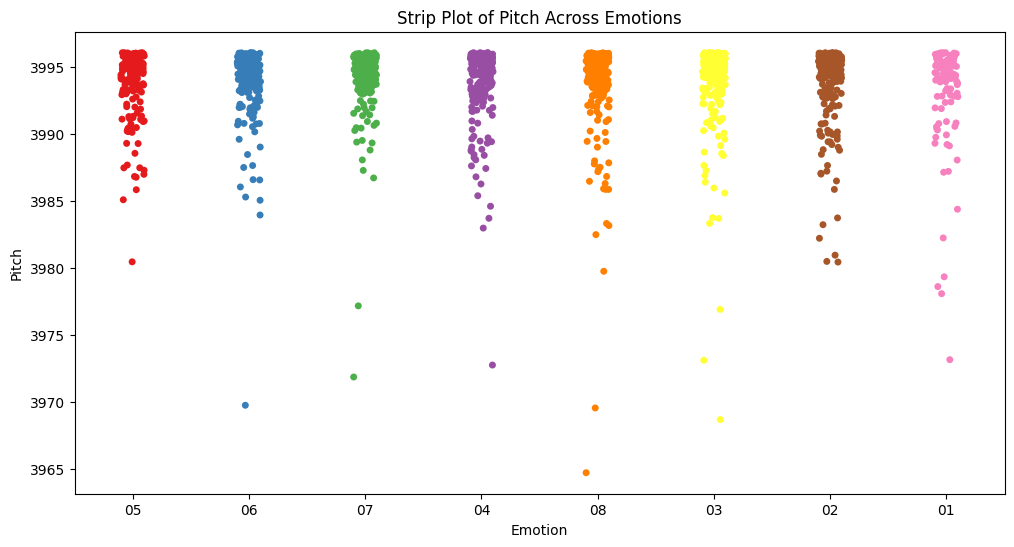

In [14]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='Emotion', y='Pitch', data=df, jitter=True, palette='Set1')
plt.title('Strip Plot of Pitch Across Emotions')
plt.xlabel('Emotion')
plt.ylabel('Pitch')
plt.show()